# Import Basic Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Read Dataset

In [2]:
data = pd.read_csv("Darknet.csv")
data.shape

(141530, 85)

In [3]:
data.head()

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Label.1
0,10.152.152.11-216.58.220.99-57158-443-6,10.152.152.11,57158,216.58.220.99,443,6,24/07/2015 04:09:48 PM,229,1,1,...,0,0,0,0,0.000000e+00,0.000,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
1,10.152.152.11-216.58.220.99-57159-443-6,10.152.152.11,57159,216.58.220.99,443,6,24/07/2015 04:09:48 PM,407,1,1,...,0,0,0,0,0.000000e+00,0.000,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
2,10.152.152.11-216.58.220.99-57160-443-6,10.152.152.11,57160,216.58.220.99,443,6,24/07/2015 04:09:48 PM,431,1,1,...,0,0,0,0,0.000000e+00,0.000,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
3,10.152.152.11-74.125.136.120-49134-443-6,10.152.152.11,49134,74.125.136.120,443,6,24/07/2015 04:09:48 PM,359,1,1,...,0,0,0,0,0.000000e+00,0.000,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
4,10.152.152.11-173.194.65.127-34697-19305-6,10.152.152.11,34697,173.194.65.127,19305,6,24/07/2015 04:09:45 PM,10778451,591,400,...,0,0,0,0,1.440000e+15,3117718.131,1.440000e+15,1.440000e+15,Non-Tor,AUDIO-STREAMING


In [4]:
data.columns

Index(['Flow ID', 'Src IP', 'Src Port', 'Dst IP', 'Dst Port', 'Protocol',
       'Timestamp', 'Flow Duration', 'Total Fwd Packet', 'Total Bwd packets',
       'Total Length of Fwd Packet', 'Total Length of Bwd Packet',
       'Fwd Packet Length Max', 'Fwd Packet Length Min',
       'Fwd Packet Length Mean', 'Fwd Packet Length Std',
       'Bwd Packet Length Max', 'Bwd Packet Length Min',
       'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s',
       'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
       'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std',
       'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean',
       'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags',
       'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Packet Length Min', 'Packet Length Max', 'Packet Length Mean',
       'Packet Length Std', 'Packet Len

In [5]:
lable = data["Label"].unique()
lable

array(['Non-Tor', 'NonVPN', 'Tor', 'VPN'], dtype=object)

In [6]:
data['Label'].value_counts()

Non-Tor    93356
NonVPN     23863
VPN        22919
Tor         1392
Name: Label, dtype: int64

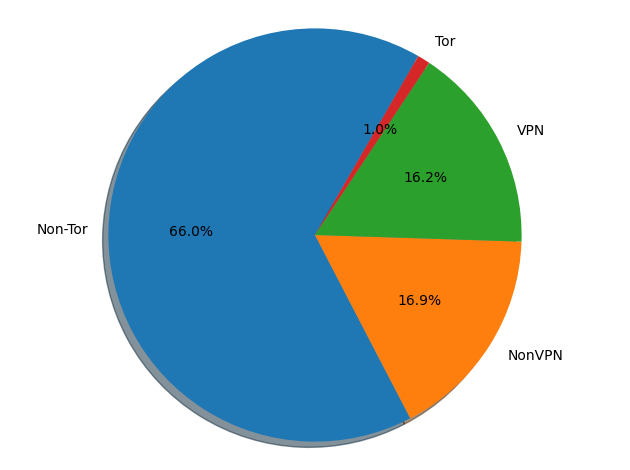

In [7]:
ExitedValues = data.Label.value_counts()
labels = ["Non-Tor","NonVPN","VPN", "Tor"]
fig1, f1 = plt.subplots()
f1.pie(ExitedValues,labels=labels, autopct='%1.1f%%',shadow=True, startangle=60) 
f1.axis('equal')
plt.tight_layout()
plt.show()

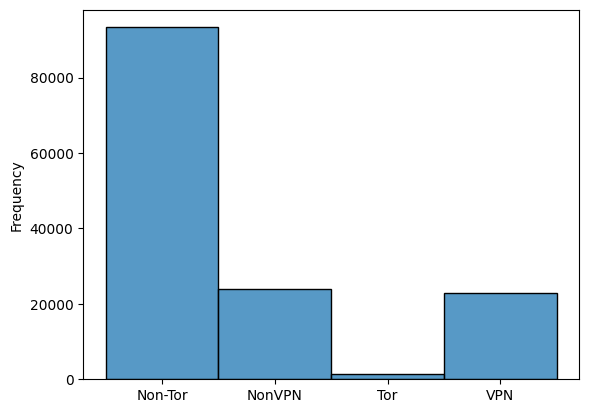

In [8]:
sns.histplot(data=data, x="Label", stat="frequency")
plt.xlabel('')

plt.show()

In [9]:
data["Label.1"].unique()

array(['AUDIO-STREAMING', 'Browsing', 'Chat', 'Email', 'File-Transfer',
       'File-transfer', 'P2P', 'Video-Streaming', 'Audio-Streaming',
       'Video-streaming', 'VOIP'], dtype=object)

In [10]:
data['Label.1'].loc[data['Label.1'] == 'AUDIO-STREAMING'] = 'Audio-Streaming'
data['Label.1'].loc[data['Label.1'] == 'File-transfer'] = 'File-Transfer'
data['Label.1'].loc[data['Label.1'] == 'Video-streaming'] = 'Video-Streaming'

In [11]:
data["Label.1"].unique()

array(['Audio-Streaming', 'Browsing', 'Chat', 'Email', 'File-Transfer',
       'P2P', 'Video-Streaming', 'VOIP'], dtype=object)

In [12]:
data['Label.1'].value_counts()

P2P                48520
Browsing           32808
Audio-Streaming    18064
Chat               11478
File-Transfer      11182
Video-Streaming     9767
Email               6145
VOIP                3566
Name: Label.1, dtype: int64

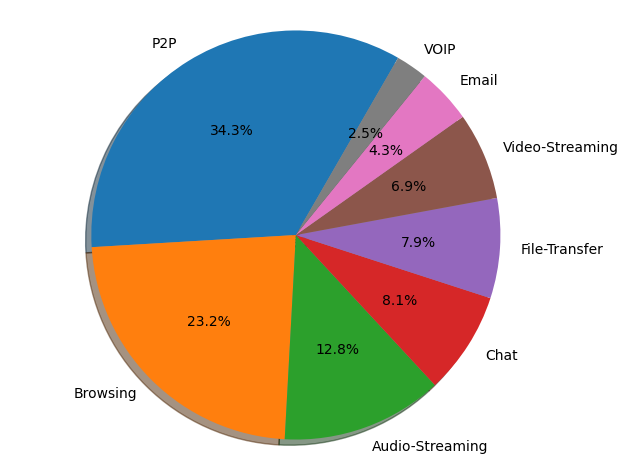

In [13]:
# this plot is to show how Geography play a role at the customer churn 
ExitedValues = data['Label.1'].value_counts()
labels = ["P2P","Browsing","Audio-Streaming", "Chat","File-Transfer","Video-Streaming","Email","VOIP"]
fig1, f1 = plt.subplots()
f1.pie(ExitedValues,labels=labels, autopct='%1.1f%%',shadow=True, startangle=60) 
f1.axis('equal')
plt.tight_layout()
plt.show()

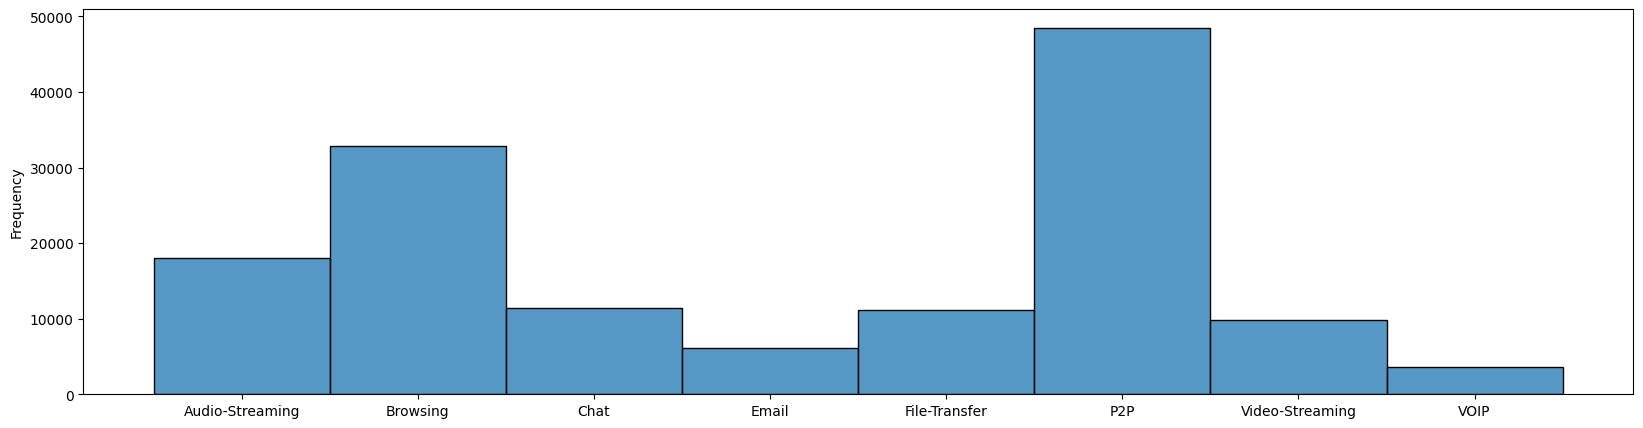

In [14]:
fig, ax = plt.subplots(figsize=(20,5))
sns.histplot(data=data, x="Label.1", stat="frequency")
plt.xlabel('')
plt.show()

In [15]:
data['Label'].loc[(data['Label'] == 'Non-Tor') | (data['Label'] == 'NonVPN')] = 'Benign'                # Legal Files, Safe Files
data['Label'].loc[(data['Label'] == 'Tor') | (data['Label'] == 'VPN')] = 'Darknet'                      # illegal Files, Unsafe Files

In [16]:
data["Label"].unique()

array(['Benign', 'Darknet'], dtype=object)

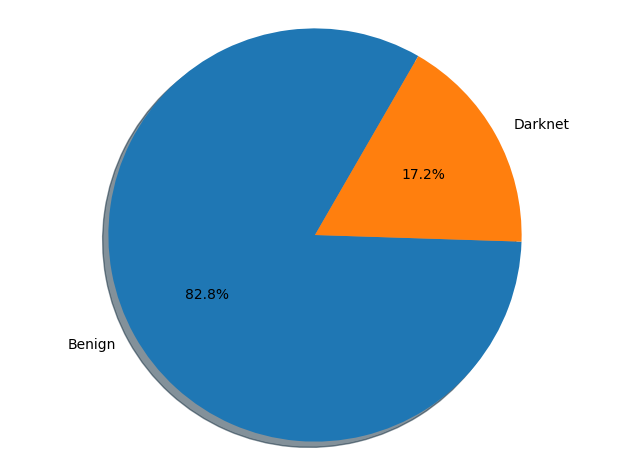

In [17]:

colors = ['#ff00ff', '#99ff00']
ExitedValues = data['Label'].value_counts()
labels = ["Benign","Darknet"]
fig1, f1 = plt.subplots()
f1.pie(ExitedValues,labels=labels, autopct='%1.1f%%',shadow=True, startangle=60) 
f1.axis('equal')
plt.tight_layout()
plt.show()

In [18]:
hours = []
for timestamp in data['Timestamp']:
    hour = int(timestamp.split()[1].split(':')[0])
    hours.append(hour)
data['hour'] = hours
print(data[['Timestamp', 'hour']][:5])

                Timestamp  hour
0  24/07/2015 04:09:48 PM     4
1  24/07/2015 04:09:48 PM     4
2  24/07/2015 04:09:48 PM     4
3  24/07/2015 04:09:48 PM     4
4  24/07/2015 04:09:45 PM     4


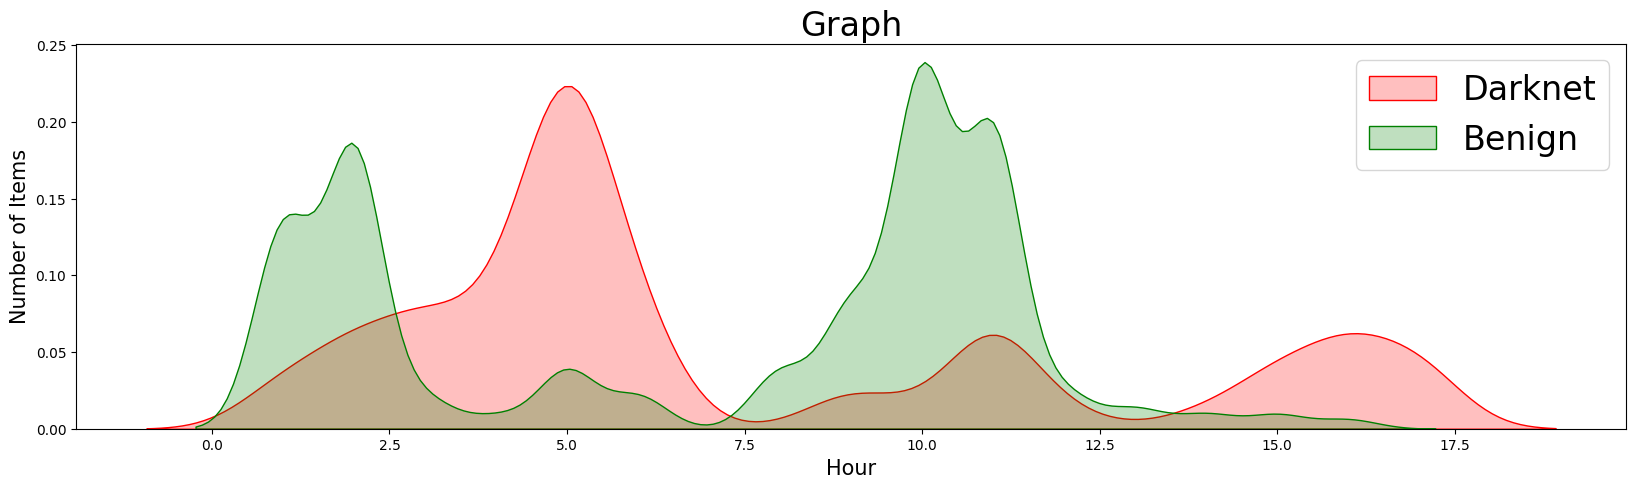

In [19]:
fig, ax = plt.subplots(figsize=(20,5))

plot_graph_darknet = data[data['Label'] == "Darknet"]
plot_graph_benign = data[data['Label'] == "Benign"]

sns.kdeplot(plot_graph_darknet['hour'], shade=True, color="red")
sns.kdeplot(plot_graph_benign['hour'], shade=True, color="green")

plt.title("Graph", fontsize = "24")
plt.xlabel("Hour", fontsize = "15")
plt.ylabel("Number of Items", fontsize = "15")

plt.legend(['Darknet', 'Benign'], fontsize='24')
plt.show()

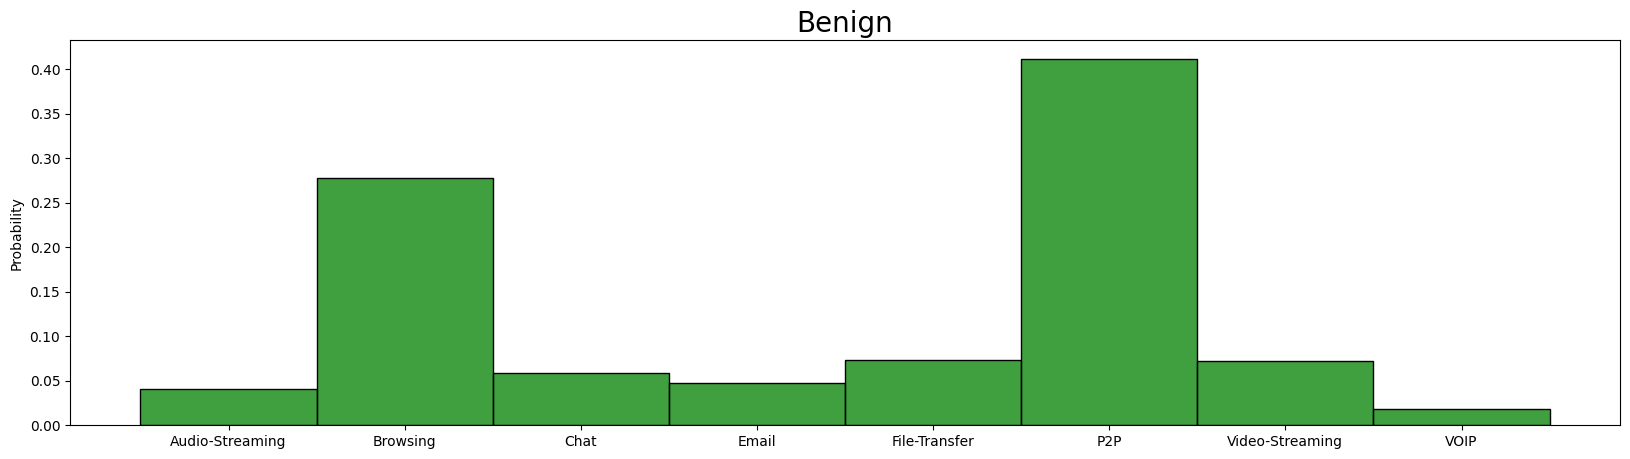

In [20]:
fig, ax = plt.subplots(figsize=(20,5))
sns.histplot(data=data[data['Label'] == "Benign"], x="Label.1", stat="probability", color='green')
plt.title("Benign", fontsize = '20')
plt.xlabel('')
plt.show()

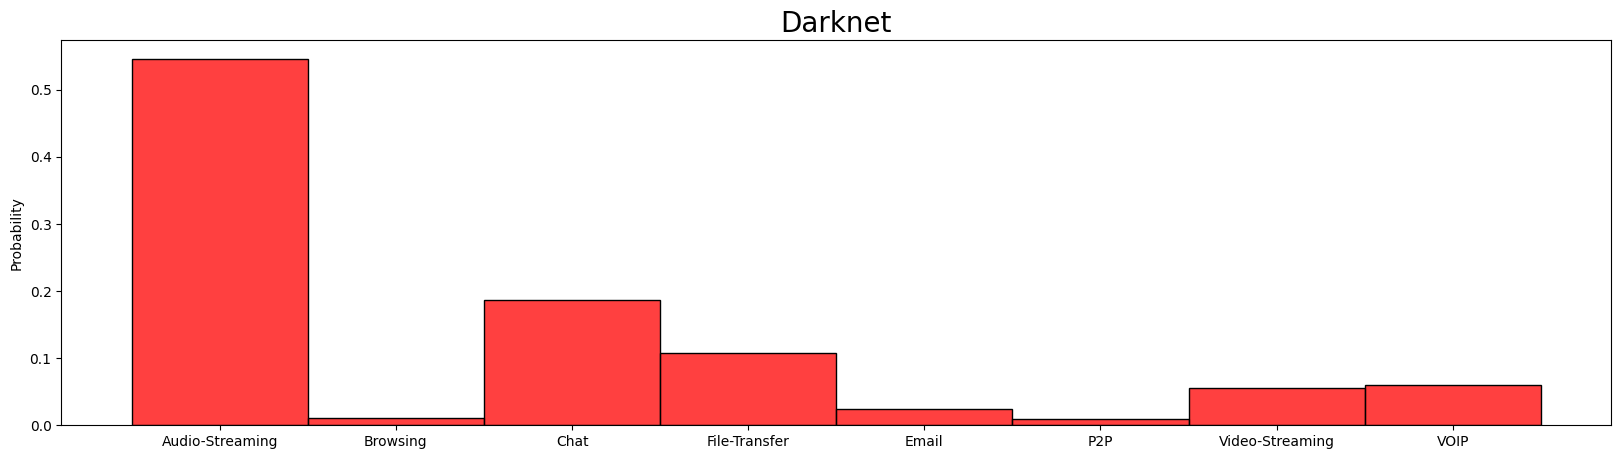

In [21]:
fig, ax = plt.subplots(figsize=(20,5))
sns.histplot(data=data[data['Label'] == "Darknet"], x="Label.1", stat="probability", color='red')
plt.title("Darknet", fontsize = '20')
plt.xlabel('')
plt.show()

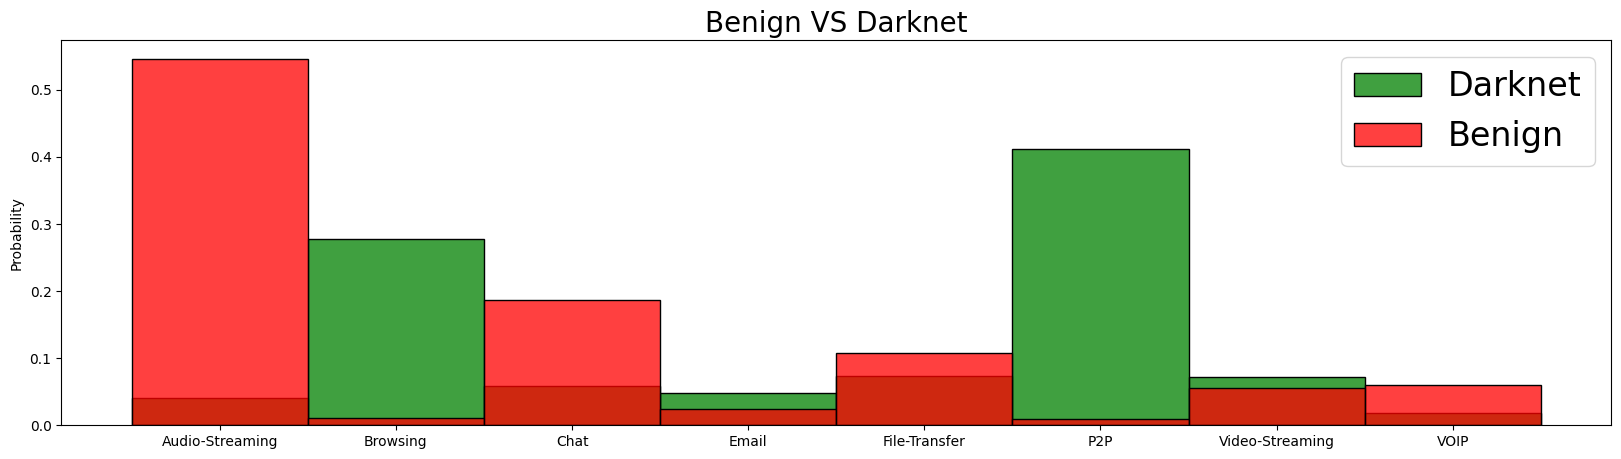

In [22]:
fig, ax = plt.subplots(figsize=(20,5))
sns.histplot(data=data[data['Label'] == "Benign"], x="Label.1", stat="probability", color='green')
sns.histplot(data=data[data['Label'] == "Darknet"], x="Label.1", stat="probability", color='red')
plt.title("Benign VS Darknet", fontsize = '20')
plt.xlabel('')
plt.legend(['Darknet', 'Benign'], fontsize='24')
plt.show()

In [24]:
data.head()

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Label.1,hour
0,10.152.152.11-216.58.220.99-57158-443-6,10.152.152.11,57158,216.58.220.99,443,6,24/07/2015 04:09:48 PM,229,1,1,...,0,0,0,0.000000e+00,0.000,0.000000e+00,0.000000e+00,Benign,Audio-Streaming,4
1,10.152.152.11-216.58.220.99-57159-443-6,10.152.152.11,57159,216.58.220.99,443,6,24/07/2015 04:09:48 PM,407,1,1,...,0,0,0,0.000000e+00,0.000,0.000000e+00,0.000000e+00,Benign,Audio-Streaming,4
2,10.152.152.11-216.58.220.99-57160-443-6,10.152.152.11,57160,216.58.220.99,443,6,24/07/2015 04:09:48 PM,431,1,1,...,0,0,0,0.000000e+00,0.000,0.000000e+00,0.000000e+00,Benign,Audio-Streaming,4
3,10.152.152.11-74.125.136.120-49134-443-6,10.152.152.11,49134,74.125.136.120,443,6,24/07/2015 04:09:48 PM,359,1,1,...,0,0,0,0.000000e+00,0.000,0.000000e+00,0.000000e+00,Benign,Audio-Streaming,4
4,10.152.152.11-173.194.65.127-34697-19305-6,10.152.152.11,34697,173.194.65.127,19305,6,24/07/2015 04:09:45 PM,10778451,591,400,...,0,0,0,1.440000e+15,3117718.131,1.440000e+15,1.440000e+15,Benign,Audio-Streaming,4


In [23]:
# unigram, bigram and trigram extraction
def create_grams(ip):
    parts = ip.split('.')
    one_gram = parts[0]
    two_gram = parts[0] + " " + parts[1]
    three_gram = parts[0] + " " + parts[1] + " " + parts[2]
    return one_gram, two_gram, three_gram

In [24]:
src_one_gram = []
src_two_gram = []
src_three_gram = []
dst_one_gram = []
dst_two_gram = []
dst_three_gram = []

for src_ip, dst_ip in zip(data["Src IP"], data["Dst IP"]): 
    src_one, src_two, src_three = create_grams(src_ip)
    src_one_gram.append(src_one)
    src_two_gram.append(src_two)
    src_three_gram.append(src_three)
    dst_one, dst_two, dst_three = create_grams(dst_ip)
    dst_one_gram.append(dst_one)
    dst_two_gram.append(dst_two)
    dst_three_gram.append(dst_three)


In [25]:
data["src_ip_1gram"] = src_one_gram
data["src_ip_2gram"] = src_two_gram
data["src_ip_3gram"] = src_three_gram

In [26]:
data["dst_ip_1gram"] = dst_one_gram
data["dst_ip_2gram"] = dst_two_gram
data["dst_ip_3gram"] = dst_three_gram

In [27]:
print(data[["Src IP","src_ip_1gram","src_ip_2gram","src_ip_3gram"]][200:205])
print("--------------------------------------------------------")
print(data[["Dst IP","dst_ip_1gram","dst_ip_2gram","dst_ip_3gram"]][:5])

            Src IP src_ip_1gram src_ip_2gram src_ip_3gram
200  10.152.152.11           10       10 152   10 152 152
201  74.125.28.189           74       74 125    74 125 28
202  74.125.28.189           74       74 125    74 125 28
203  10.152.152.11           10       10 152   10 152 152
204  10.152.152.11           10       10 152   10 152 152
--------------------------------------------------------
           Dst IP dst_ip_1gram dst_ip_2gram dst_ip_3gram
0   216.58.220.99          216       216 58   216 58 220
1   216.58.220.99          216       216 58   216 58 220
2   216.58.220.99          216       216 58   216 58 220
3  74.125.136.120           74       74 125   74 125 136
4  173.194.65.127          173      173 194   173 194 65


In [28]:
data.columns

Index(['Flow ID', 'Src IP', 'Src Port', 'Dst IP', 'Dst Port', 'Protocol',
       'Timestamp', 'Flow Duration', 'Total Fwd Packet', 'Total Bwd packets',
       'Total Length of Fwd Packet', 'Total Length of Bwd Packet',
       'Fwd Packet Length Max', 'Fwd Packet Length Min',
       'Fwd Packet Length Mean', 'Fwd Packet Length Std',
       'Bwd Packet Length Max', 'Bwd Packet Length Min',
       'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s',
       'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
       'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std',
       'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean',
       'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags',
       'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Packet Length Min', 'Packet Length Max', 'Packet Length Mean',
       'Packet Length Std', 'Packet Len

In [29]:
data.shape

(141530, 92)

In [30]:
real_columns = ['Flow Duration', 'Total Fwd Packet', 'Total Bwd packets', 'Total Length of Fwd Packet', 'Total Length of Bwd Packet', 'Fwd Packet Length Max', 'Fwd Packet Length Min', 'Fwd Packet Length Mean', 'Fwd Packet Length Std', 'Bwd Packet Length Max', 'Bwd Packet Length Min', 'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length', 'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s', 'Packet Length Min', 'Packet Length Max', 'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count', 'SYN Flag Count', 'RST Flag Count', 'PSH Flag Count', 'ACK Flag Count', 'URG Flag Count', 'CWE Flag Count', 'ECE Flag Count', 'Down/Up Ratio', 'Average Packet Size', 'Fwd Segment Size Avg', 'Bwd Segment Size Avg', 'Fwd Bytes/Bulk Avg', 'Fwd Packet/Bulk Avg', 'Fwd Bulk Rate Avg', 'Bwd Bytes/Bulk Avg', 'Bwd Packet/Bulk Avg', 'Bwd Bulk Rate Avg', 'Subflow Fwd Packets', 'Subflow Fwd Bytes', 'Subflow Bwd Packets', 'Subflow Bwd Bytes', 'FWD Init Win Bytes', 'Bwd Init Win Bytes', 'Fwd Act Data Pkts', 'Fwd Seg Size Min']
print(real_columns)

['Flow Duration', 'Total Fwd Packet', 'Total Bwd packets', 'Total Length of Fwd Packet', 'Total Length of Bwd Packet', 'Fwd Packet Length Max', 'Fwd Packet Length Min', 'Fwd Packet Length Mean', 'Fwd Packet Length Std', 'Bwd Packet Length Max', 'Bwd Packet Length Min', 'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length', 'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s', 'Packet Length Min', 'Packet Length Max', 'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count', 'SYN Flag Count', 'RST Flag Count', 'PSH Flag Count', 'ACK Flag Count', 'URG Flag Count', 'CWE Flag Count', 'ECE Flag Count', 'Down/Up Ratio', 'Average

In [31]:
samples = data.copy()

In [32]:
is_na_cols = samples.columns[samples.isna().sum() > 0]
samples.isna().sum()[is_na_cols] 

Flow Bytes/s    47
dtype: int64

In [33]:
samples = samples.dropna()
samples.isna().sum()[is_na_cols] 

Flow Bytes/s    0
dtype: int64

In [34]:
samples[real_columns] = samples[real_columns].astype(np.float64)
samples[real_columns] = samples[real_columns].replace([np.inf, -np.inf], np.nan)
samples[real_columns] = samples[real_columns].dropna()

In [35]:
del samples['Flow ID']
del samples['Timestamp']
del samples['Src IP']
del samples['Dst IP']

In [36]:
samples.head()

,Src Port,Dst Port,Protocol,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,...,Idle Min,Label,Label.1,hour,src_ip_1gram,src_ip_2gram,src_ip_3gram,dst_ip_1gram,dst_ip_2gram,dst_ip_3gram
0,57158,443,6,229.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.000000e+00,Benign,Audio-Streaming,4,10,10 152,10 152 152,216,216 58,216 58 220
1,57159,443,6,407.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.000000e+00,Benign,Audio-Streaming,4,10,10 152,10 152 152,216,216 58,216 58 220
2,57160,443,6,431.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.000000e+00,Benign,Audio-Streaming,4,10,10 152,10 152 152,216,216 58,216 58 220
3,49134,443,6,359.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.000000e+00,Benign,Audio-Streaming,4,10,10 152,10 152 152,74,74 125,74 125 136
4,34697,19305,6,10778451.0,591.0,400.0,64530.0,6659.0,131.0,0.0,...,1.440000e+15,Benign,Audio-Streaming,4,10,10 152,10 152 152,173,173 194,173 194 65


In [37]:
samples.columns[:81]

Index(['Src Port', 'Dst Port', 'Protocol', 'Flow Duration', 'Total Fwd Packet',
       'Total Bwd packets', 'Total Length of Fwd Packet',
       'Total Length of Bwd Packet', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags',
       'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Packet Length Min', 'Packet Length Max', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count',
       'SYN

In [38]:
samples.columns[81:]

Index(['hour', 'src_ip_1gram', 'src_ip_2gram', 'src_ip_3gram', 'dst_ip_1gram',
       'dst_ip_2gram', 'dst_ip_3gram'],
      dtype='object')

In [39]:
cols = np.concatenate((samples.columns[81:], samples.columns[:81]))
samples = samples[cols]

In [40]:
samples.columns

Index(['hour', 'src_ip_1gram', 'src_ip_2gram', 'src_ip_3gram', 'dst_ip_1gram',
       'dst_ip_2gram', 'dst_ip_3gram', 'Src Port', 'Dst Port', 'Protocol',
       'Flow Duration', 'Total Fwd Packet', 'Total Bwd packets',
       'Total Length of Fwd Packet', 'Total Length of Bwd Packet',
       'Fwd Packet Length Max', 'Fwd Packet Length Min',
       'Fwd Packet Length Mean', 'Fwd Packet Length Std',
       'Bwd Packet Length Max', 'Bwd Packet Length Min',
       'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s',
       'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
       'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std',
       'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean',
       'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags',
       'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Packet Length Min', 'Packet Length 

In [41]:
samples.head()

,hour,src_ip_1gram,src_ip_2gram,src_ip_3gram,dst_ip_1gram,dst_ip_2gram,dst_ip_3gram,Src Port,Dst Port,Protocol,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Label.1
0,4,10,10 152,10 152 152,216,216 58,216 58 220,57158,443,6,...,0,0,0,0,0.000000e+00,0.000,0.000000e+00,0.000000e+00,Benign,Audio-Streaming
1,4,10,10 152,10 152 152,216,216 58,216 58 220,57159,443,6,...,0,0,0,0,0.000000e+00,0.000,0.000000e+00,0.000000e+00,Benign,Audio-Streaming
2,4,10,10 152,10 152 152,216,216 58,216 58 220,57160,443,6,...,0,0,0,0,0.000000e+00,0.000,0.000000e+00,0.000000e+00,Benign,Audio-Streaming
3,4,10,10 152,10 152 152,74,74 125,74 125 136,49134,443,6,...,0,0,0,0,0.000000e+00,0.000,0.000000e+00,0.000000e+00,Benign,Audio-Streaming
4,4,10,10 152,10 152 152,173,173 194,173 194 65,34697,19305,6,...,0,0,0,0,1.440000e+15,3117718.131,1.440000e+15,1.440000e+15,Benign,Audio-Streaming


In [42]:
model_samples = samples.copy()

In [43]:
hash_enc_cols = ['src_ip_1gram', 'src_ip_2gram', 'src_ip_3gram', 'dst_ip_1gram',
 'dst_ip_2gram', 'dst_ip_3gram']
print(hash_enc_cols)

['src_ip_1gram', 'src_ip_2gram', 'src_ip_3gram', 'dst_ip_1gram', 'dst_ip_2gram', 'dst_ip_3gram']


In [44]:
from category_encoders.hashing import HashingEncoder

In [45]:
hash_enc = HashingEncoder(cols=hash_enc_cols, n_components=100).fit(model_samples)
model_samples = hash_enc.transform(model_samples)

In [46]:
from category_encoders.hashing import HashingEncoder
hash_enc = HashingEncoder(cols=hash_enc_cols, n_components=100).fit(model_samples)
model_samples = hash_enc.transform(model_samples)
model_samples.head()

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Label.1
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.000000e+00,0.000,0.000000e+00,0.000000e+00,Benign,Audio-Streaming
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.000000e+00,0.000,0.000000e+00,0.000000e+00,Benign,Audio-Streaming
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.000000e+00,0.000,0.000000e+00,0.000000e+00,Benign,Audio-Streaming
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.000000e+00,0.000,0.000000e+00,0.000000e+00,Benign,Audio-Streaming
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1.440000e+15,3117718.131,1.440000e+15,1.440000e+15,Benign,Audio-Streaming


In [47]:
model_samples.columns

Index(['col_0', 'col_1', 'col_2', 'col_3', 'col_4', 'col_5', 'col_6', 'col_7',
       'col_8', 'col_9',
       ...
       'Active Mean', 'Active Std', 'Active Max', 'Active Min', 'Idle Mean',
       'Idle Std', 'Idle Max', 'Idle Min', 'Label', 'Label.1'],
      dtype='object', length=182)

In [48]:
from sklearn.preprocessing import StandardScaler

In [49]:
scaler = StandardScaler().fit(model_samples[real_columns])
model_samples[real_columns] = scaler.transform(model_samples[real_columns])
model_samples[real_columns].head()

,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,...,Bwd Packet/Bulk Avg,Bwd Bulk Rate Avg,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,FWD Init Win Bytes,Bwd Init Win Bytes,Fwd Act Data Pkts,Fwd Seg Size Min
0,-0.546508,-0.063838,-0.044949,-0.034644,-0.028574,-0.321759,-0.498852,-0.316449,-0.379416,-0.292366,...,-0.052228,-0.043209,-0.634075,-0.313203,0.0,-0.413046,-0.345303,-0.095141,-0.061219,0.589647
1,-0.546503,-0.063838,-0.044949,-0.034644,-0.028574,-0.321759,-0.498852,-0.316449,-0.379416,-0.292366,...,-0.052228,-0.043209,-0.634075,-0.313203,0.0,-0.413046,-0.335704,-0.095141,-0.061219,0.589647
2,-0.546502,-0.063838,-0.044949,-0.034644,-0.028574,-0.321759,-0.498852,-0.316449,-0.379416,-0.292366,...,-0.052228,-0.043209,-0.634075,-0.313203,0.0,-0.413046,-0.329439,-0.095141,-0.061219,0.589647
3,-0.546504,-0.063838,-0.044949,-0.034644,-0.028574,-0.321759,-0.498852,-0.316449,-0.379416,-0.292366,...,-0.052228,-0.043209,-0.634075,-0.313203,0.0,-0.413046,-0.333582,-0.095141,-0.061219,0.589647
4,-0.263585,0.184194,0.071741,-0.014801,-0.027116,-0.120075,-0.498852,0.179861,-0.247304,0.340530,...,0.164343,-0.036900,-0.634075,0.158678,0.0,-0.368398,-0.396835,0.073134,0.305786,0.589647


In [50]:
samples = samples.dropna()
model_samples = model_samples.dropna()
print(samples[samples.columns[samples.isna().sum()>0]].isna().sum())

Series([], dtype: float64)


In [51]:
samples.to_csv('samples.csv', index=False)

In [52]:
model_samples.to_csv('model_samples.csv', index=False)